In [1]:
# Intro

import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

q = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
# Summary Statistics

q3 = "Select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q4 = "Select name from facts where population = 0"
pd.read_sql_query(q4, conn)

,name
0,Antarctica


In [5]:
q5 = "Select name from facts where population = 7256490011"
pd.read_sql_query(q5, conn)

,name
0,World


In [6]:
# Histogram for population

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = [10,10])

q6 = "Select population, population_growth, birth_rate, death_rate from facts where population != (Select MIN(population) from facts) and population != (Select MAX(population) from facts)"
df = pd.read_sql_query(q6, conn)

df

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


In [18]:
# Countries with highest population density

q7 = "Select name, population, area, cast(population as float) / cast(area as float) pop_density from facts where population != (Select MIN(population) from facts) and population != (Select MAX(population) from facts) order by pop_density desc limit 20"
density = pd.read_sql_query(q7, conn)

density

,name,population,area,pop_density
0,Macau,592731,28,21168.964286
1,Monaco,30535,2,15267.500000
2,Singapore,5674472,697,8141.279770
3,Hong Kong,7141106,1108,6445.041516
4,Gaza Strip,1869055,360,5191.819444
5,Gibraltar,29258,6,4876.333333
6,Bahrain,1346613,760,1771.859211
7,Maldives,393253,298,1319.640940
8,Malta,413965,316,1310.015823
9,Bermuda,70196,54,1299.925926


(0, 25000)

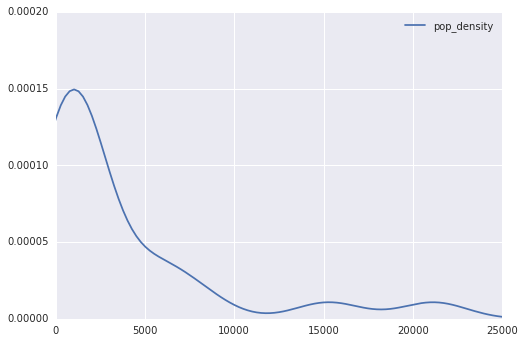

In [20]:
import seaborn as sns

sns.kdeplot(density['pop_density'])
plt.ylim(0, 0.0002)
plt.xlim(0, 25000)

In [22]:
# Countries with highest ratios of water/land

q8 = "Select name, area_land, area_water, cast(area_land as float) / cast(area_water as float) land_water_ratio from facts order by land_water_ratio desc limit 20"
land_water = pd.read_sql_query(q8, conn)

land_water

,name,area_land,area_water,land_water_ratio
0,Bosnia and Herzegovina,51187,10,5118.700000
1,Niger,1266700,300,4222.333333
2,Morocco,446300,250,1785.200000
3,Guinea,245717,140,1755.121429
4,Costa Rica,51060,40,1276.500000
5,Djibouti,23180,20,1159.000000
6,"Korea, North",120408,130,926.215385
7,Cyprus,9241,10,924.100000
8,Namibia,823290,1002,821.646707
9,Burkina Faso,273800,400,684.500000


In [30]:
# Countries with more water than land

q9 = "Select name, cast(area_water as float) / cast(area as float) water_ratio from facts where water_ratio > 0.5 order by water_ratio desc"
more_water = pd.read_sql_query(q9, conn)

more_water

,name,water_ratio
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848
